In [2]:
using LinearAlgebra
using IterativeSolvers

`N` dimensionality of each datum  
`d` -> number of items  

# Notation
### From Class
X = DZ  
### OMP.jl
inputs: 
+ x - dictionary
+ y - signal
+ k - sparsity level
returns:
+ B -> Z

## Inputs

In [3]:
N = 512;
d = 88;

$\Phi$ is dictionary

In [4]:
Φ = randn(N, d)

512×88 Array{Float64,2}:
 -1.04379     1.09008     1.73652    …  -0.797694    2.62613    0.421223
  0.26917    -1.84823    -1.46459       -0.33726    -0.746162  -0.104682
  0.22485    -1.77419    -0.354652      -1.1366     -1.70312   -2.53911
  1.73613     0.999488   -1.0829         2.94469    -1.33117    0.41807
 -0.296942   -0.152003    0.0648939     -0.375722   -0.535577  -0.747945
  1.90163    -0.0347076   0.897986   …  -0.128682   -1.18115   -0.01037
  1.48461     0.204569   -0.932967       0.854107   -0.619947   0.403909
  0.849648    0.457364   -0.666167       0.913424   -0.419295   0.172189
  1.36546    -0.301136   -0.427349       1.19234     0.58728   -1.51931
  0.0307112  -0.410098   -1.2476        -0.389059   -0.287506   0.0178523
  0.836828   -0.418791   -0.370747   …   1.15202    -0.544986  -0.943365
 -0.867254   -0.563768    0.801144      -0.0603832   0.346685  -0.733793
  0.858811    0.374641   -0.68648       -1.19412     0.741132   0.702739
  ⋮                          

In [23]:
v = rand(N, 100)

512×100 Array{Float64,2}:
 0.387861    0.710587   0.486035    …  0.808058   0.564361   0.494555
 0.105626    0.876892   0.417536       0.21331    0.517783   0.815321
 0.0912704   0.407597   0.353944       0.950520   0.261678   0.258195
 0.90285     0.857085   0.955634       0.970023   0.528924   0.952588
 0.407750    0.340025   0.559614       0.858738   0.439824   0.284426
 0.443401    0.313156   0.23744     …  0.193725   0.921618   0.511
 0.0690555   0.643578   0.476655       0.992723   0.539806   0.663394
 0.519026    0.516892   0.577458       0.5707     0.258162   0.469211
 0.598774    0.04963    0.170848       0.546338   0.161618   0.540462
 0.0517297   0.377577   0.537567       0.908449   0.569159   0.559463
 0.461902    0.0736741  0.310444    …  0.256338   0.862274   0.148339
 0.65315     0.885598   0.0391528      0.482817   0.783168   0.179205
 0.286509    0.288815   0.217218       0.867605   0.0608605  0.51072
 ⋮                                  ⋱                               

`m` is Sparsity level (max non-zeros)

In [24]:
m = 10;

## Algorithm

In [34]:
function OMP(v, Φ, m)
    r = v;
    Λ = [];
    z = [];

    for t = 1:m
        dots = Φ'*r
        print(size(dots))
        λ = argmax(abs.(dots))
        ϕ = dots[λ,:]

        if !any(Λ .== λ)
            push!(Λ, λ)
        end

        temp = Φ[:, Λ]

        z = lsqr(temp, v)

        r = v-temp*z
        r = r[:]

    end
    ret = zeros(size(Φ, 2));
    ret[Λ] = z;
    return ret
end

OMP (generic function with 1 method)

In [35]:
size(OMP(v, Φ, 10))

(88, 100)

ErrorException: iteration is deliberately unsupported for CartesianIndex. Use `I` rather than `I...`, or use `Tuple(I)...`

In [11]:
using Plots

In [12]:
sum(!iszero, omp(v,Φ,80))

80

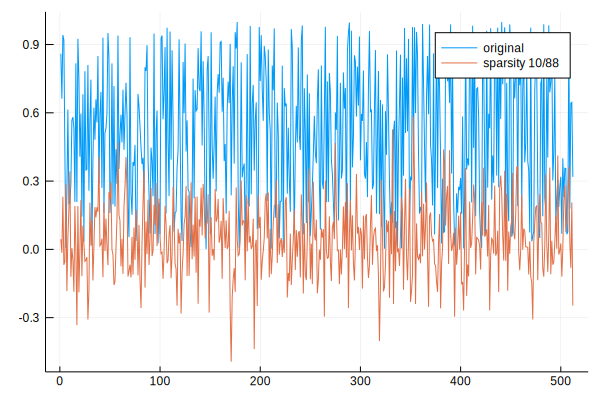

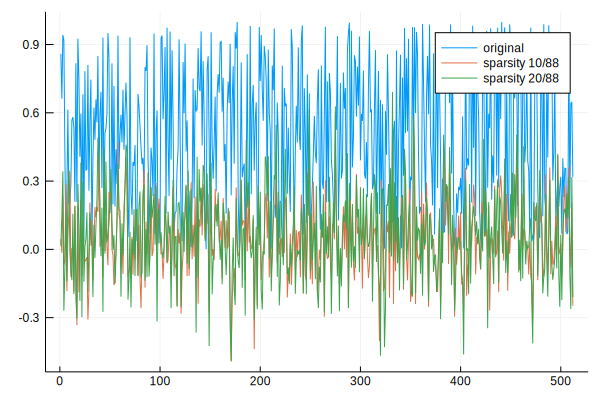

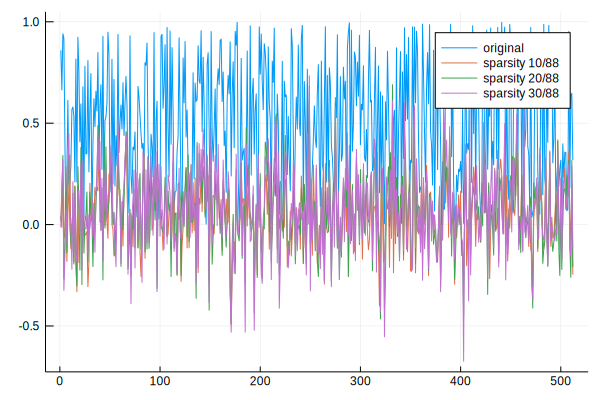

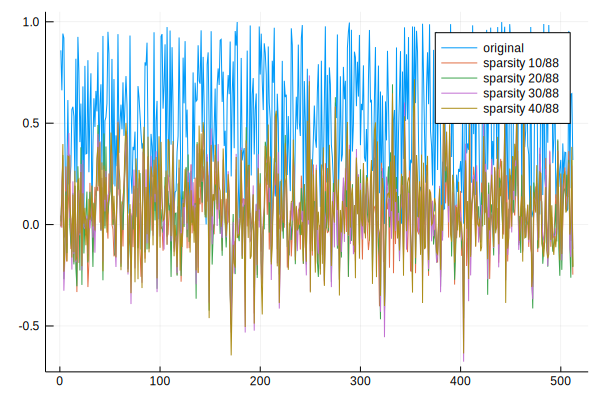

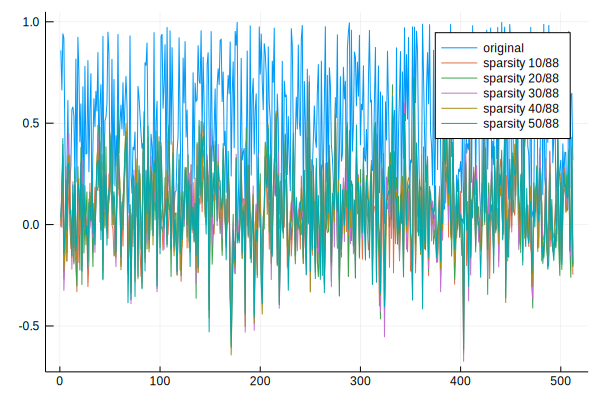

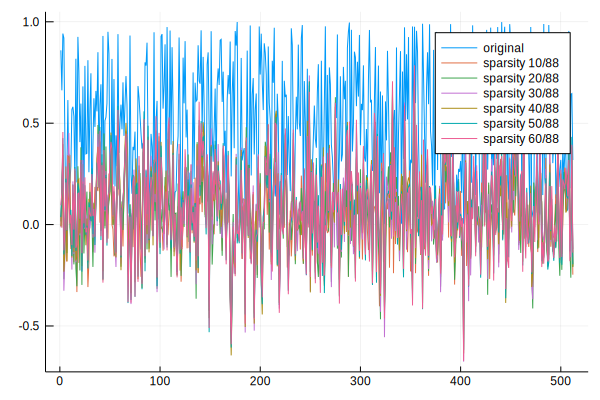

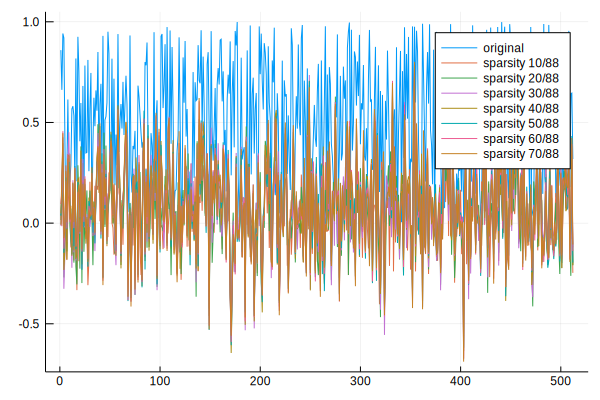

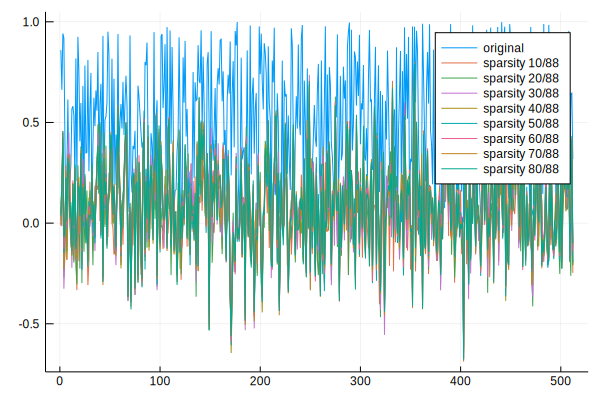

In [13]:
plot(v, lab="original")
for i=1:d
    soln = Φ*omp(v,Φ,i)
    if i%10 == 0
        display(plot!(soln, lab="sparsity $i/$d"))
    end
end

In [166]:
norm(ret'*Φ-v)

DimensionMismatch: DimensionMismatch("dimensions must match")

In [170]:
Φ'*ret

8-element Array{Float64,1}:
 -0.002671957979391487
 -0.15428296493483237
 -0.07806839739894422
  0.08526927263287616
  0.058667173413482876
 -0.023779849384624283
 -0.09710434431601772
 -0.2066964171146448

In [169]:
Φ

15×8 Array{Float64,2}:
 -0.227558   -2.2016    -0.283383   …   0.156463  -0.450085    -0.729005
 -1.64199     0.170720  -0.615193      -1.00276   -0.533467    -1.0739
 -1.01756    -0.562383   2.16795        1.33642    1.84272     -0.531698
  1.89712    -0.562152  -1.06755       -1.12833    0.00948955   1.74087
 -0.0991503  -0.962766  -1.12824       -1.31807    0.837602     0.467319
  0.756217    1.96366    0.737434   …  -1.02723   -0.617642     0.834764
 -1.6244     -0.735188   0.16077        0.580790   0.171909     0.234947
  1.12339    -1.38058   -0.626641       0.137920  -1.82458     -1.84978
 -0.350018   -0.887293   0.509424      -0.47322    0.251097     1.59653
  2.15242     0.342262   0.0517284      2.26842   -0.711402     0.549304
  0.986494   -1.44434   -0.447965   …  -0.145944   0.427995     0.584753
 -1.46286     0.944288  -0.544666      -0.285147   0.520472     0.887993
 -0.755901   -1.63815    0.121367       1.5342     0.19374      0.532632
 -1.67526     1.50322   -1.36438 

In [168]:
v

15-element Array{Float64,1}:
 0.20518794839206933
 0.7670213320187182
 0.45637673066109796
 0.6409847372303275
 0.3491386417345317
 0.6085248184570806
 0.7086193216783263
 0.022558955053626262
 0.7355874830581675
 0.6310522090044026
 0.37632028749350677
 0.3652342937403099
 0.3106630429004331
 0.42440461413857467
 0.32830302785525545

In [97]:
ret

5-element Array{Float64,1}:
 0.07347713622568386
 0.0
 0.0
 0.0
 0.0

In [91]:
size(r)

(5,)

In [92]:
size(Φ)

(5, 8)

In [76]:
zeros(size(v))

5-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [77]:
z[Λ]

BoundsError: BoundsError: attempt to access 3-element Array{Float64,1} at index [Any[1, 5, 7]]

In [58]:
v

5-element Array{Float64,1}:
 0.8063172745015021
 0.08049939295582598
 0.11244693774808456
 0.16513330238007629
 0.2182517384167455

In [16]:
Φ[:,Λ]

5×2 Array{Float64,2}:
  1.27085    1.00182
  1.38029   -1.03254
 -1.03655   -0.573562
  0.564203   0.473374
  0.229944  -0.935854

In [149]:
temp

5×2 Array{Float64,2}:
 -0.721390   0.896269
  0.230111  -0.188208
  1.53912    0.321627
  0.705127   1.02623
  0.296972  -1.15943

In [150]:
r

5-element Array{Float64,1}:
  0.5088076394548491
  0.25555394604771386
  0.1267584781679113
  0.16187115828416399
 -0.003345141627836265

In [147]:
Φ[:,[1,2]]

5×2 Array{Float64,2}:
  0.444118    1.61204
  0.441788   -1.1854
  0.64308     1.26502
 -0.0918655  -1.42929
 -0.510823   -0.225093

In [148]:
Φ[:,Λ]

5×2 Array{Float64,2}:
 -0.721390   0.896269
  0.230111  -0.188208
  1.53912    0.321627
  0.705127   1.02623
  0.296972  -1.15943

In [133]:
r[:]

5-element Array{Float64,1}:
  0.5088076394548491
  0.25555394604771386
  0.1267584781679113
  0.16187115828416399
 -0.003345141627836265

In [79]:
r

5×1 Array{Float64,2}:
  0.5753775678230739
  0.8814331928216991
  0.030093681320423116
 -0.09871465660023346
  0.793112655448944

In [80]:
Φ

5×8 Array{Float64,2}:
  0.444118    1.61204    0.204982   …   0.64483   -0.119181   -0.721390
  0.441788   -1.1854    -0.0378654     -0.137699   0.425091    0.230111
  0.64308     1.26502   -1.2622        -1.52957    0.857861    1.53912
 -0.0918655  -1.42929   -2.11585        0.763008  -1.38621     0.705127
 -0.510823   -0.225093   0.49306        0.356523  -0.0236943   0.296972

In [ ]:
t += 1

## Outputs

# Attempt 2
+ A->D - dictionary
+ w->Z - sparse vector
+ y->X - input

In [5]:
D = randn(N, d)

5×8 Array{Float64,2}:
 -0.969257  -0.361298  -1.07798   …   1.48308    1.42646     1.10054
 -0.319954   1.2117     0.407674      0.969246   0.800247   -0.445959
 -0.19779    1.67462    0.401735     -0.359555  -0.0732306   0.784489
 -0.200688  -0.338839  -0.482527      0.658844  -0.879094    1.03256
 -0.859856  -0.451813  -1.19216       1.25845   -2.61531     1.71274

In [6]:
X = rand(N)

5-element Array{Float64,1}:
 0.09411541379259769
 0.20471273894057385
 0.1490943893613208
 0.8896381947034424
 0.41810488420884484

In [8]:
Z = zeros(d, 1)

8×1 Array{Float64,2}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [ ]:
indices = []
for i=1:100
    r = X - D*Z;
    corrs = D'*rl
    # get index and value of max
    temp = argmax(abs, corrs)